In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [37]:
cust=pd.read_csv("C:/Users/ACER/Desktop/Analytixlabs/Python/Manuj_Sir_python/Assignment/4. Pandas Case Study 2 - Credit Card Case Study/Customer Acqusition.csv")
repay=pd.read_csv("C:/Users/ACER/Desktop/Analytixlabs/Python/Manuj_Sir_python/Assignment/4. Pandas Case Study 2 - Credit Card Case Study/Repayment.csv")
spend=pd.read_csv("C:/Users/ACER/Desktop/Analytixlabs/Python/Manuj_Sir_python/Assignment/4. Pandas Case Study 2 - Credit Card Case Study/spend.csv")

In [38]:
credit=pd.merge(left=cust,right=repay,left_on='Customer',right_on='Customer',how='left')
credit=pd.merge(left=credit,right=spend,left_on='Customer',right_on='Customer',how='left')

In [39]:
# dropping duplicate columns
credit.drop(columns=['No','SL No:','Sl No:'],inplace =True)

In [40]:
#dropping duplicated
credit.drop_duplicates(inplace=True)

In [7]:
# converting date columns to datetime64
credit['Month_x']=pd.to_datetime(credit['Month_x'],format='%d-%b-%y')
credit['Month_y']=pd.to_datetime(credit['Month_y'],format='%d-%b-%y')

In [42]:
credit.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Repay_Month,Repay_Amount,Spend_Month,Type,Spend_Amount
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed,12-Jan-04,495414.75,12-Jan-04,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,12-Jan-04,495414.75,3-Jan-04,PETRO,410556.13


In [11]:
#missing values
credit.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
Month_x     0
Amount_x    0
Month_y     0
Type        0
Amount_y    0
dtype: int64

In [110]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37284 entries, 0 to 37283
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        37284 non-null  int64  
 1   Customer  37284 non-null  object 
 2   Age       37284 non-null  int64  
 3   City      37284 non-null  object 
 4   Product   37284 non-null  object 
 5   Limit     37284 non-null  int64  
 6   Company   37284 non-null  object 
 7   Segment   37284 non-null  object 
 8   SL No:    37266 non-null  float64
 9   Month_x   37284 non-null  object 
 10  Amount_x  37284 non-null  float64
 11  Sl No:    37284 non-null  int64  
 12  Month_y   37284 non-null  object 
 13  Type      37284 non-null  object 
 14  Amount_y  37284 non-null  float64
dtypes: float64(3), int64(4), object(8)
memory usage: 4.6+ MB


### 1. In the above dataset,
#### a) In case age is less than 18, replace it with mean of age values

In [13]:
credit.Age.loc[credit.Age<18]=round(credit.Age.mean(),0)

C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### b)In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
#### (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [8]:
credit['Amount_y']=np.where(credit.Amount_y>credit.Limit,credit.Limit/2,credit.Amount_y)
credit

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Amount_x,Month_y,Type,Amount_y
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75,2004-01-12,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75,2004-01-03,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75,2004-01-15,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75,2004-01-25,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54,CHENNAI,Silver,100000,C19,Salaried_Pvt,2004-01-25,310992.30,2004-01-25,BIKE,54729.66
37280,A97,58,TRIVANDRUM,Platimum,10000,C20,Govt,2004-01-12,121874.90,2004-01-12,AUTO,5000.00
37281,A98,51,CALCUTTA,Platimum,10001,C21,Normal Salary,2004-01-03,337815.57,2004-01-03,SHOPPING,5000.50
37282,A99,35,CALCUTTA,Platimum,10002,C22,Self Employed,2004-01-15,25682.73,2004-01-15,AIR TICKET,5001.00


#### c) Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [10]:
credit['Amount_x']=np.where(credit.Amount_x>credit.Limit,credit.Limit,credit.Amount_x)
credit

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Amount_x,Month_y,Type,Amount_y
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75,2004-01-12,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75,2004-01-03,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75,2004-01-15,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75,2004-01-25,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54,CHENNAI,Silver,100000,C19,Salaried_Pvt,2004-01-25,100000.00,2004-01-25,BIKE,54729.66
37280,A97,58,TRIVANDRUM,Platimum,10000,C20,Govt,2004-01-12,10000.00,2004-01-12,AUTO,5000.00
37281,A98,51,CALCUTTA,Platimum,10001,C21,Normal Salary,2004-01-03,10001.00,2004-01-03,SHOPPING,5000.50
37282,A99,35,CALCUTTA,Platimum,10002,C22,Self Employed,2004-01-15,10002.00,2004-01-15,AIR TICKET,5001.00


### 2. From the above dataset create the following summaries:
#### a) How many distinct customers exist?

In [16]:
print('The count of unique customer is',credit.Customer.nunique())

The count of unique customer is 100


#### b) How many distinct categories exist?

In [17]:
print('The count of unique customer is',credit.Product.nunique())

The count of unique customer is 3


#### c) What is the average monthly spend by customers?

In [16]:
credit['Month_wise_spend']=credit.Month_y.dt.month_name()
credit

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Amount_x,Month_y,Type,Amount_y,Month_wise_spend
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75,2004-01-12,JEWELLERY,485470.80,January
1,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75,2004-01-03,PETRO,410556.13,January
2,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75,2004-01-15,CLOTHES,23740.46,January
3,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75,2004-01-25,FOOD,484342.47,January
4,A1,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75,2005-01-17,CAMERA,369694.07,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54,CHENNAI,Silver,100000,C19,Salaried_Pvt,2004-01-25,100000.00,2004-01-25,BIKE,54729.66,January
37280,A97,58,TRIVANDRUM,Platimum,10000,C20,Govt,2004-01-12,10000.00,2004-01-12,AUTO,5000.00,January
37281,A98,51,CALCUTTA,Platimum,10001,C21,Normal Salary,2004-01-03,10001.00,2004-01-03,SHOPPING,5000.50,January
37282,A99,35,CALCUTTA,Platimum,10002,C22,Self Employed,2004-01-15,10002.00,2004-01-15,AIR TICKET,5001.00,January


In [18]:
credit.groupby(by=['Customer','Month_wise_spend']).Amount_y.mean().round(0).reset_index()

,Customer,Month_wise_spend,Amount_y
0,A1,April,261649.0
1,A1,August,344372.0
2,A1,February,175236.0
3,A1,January,372763.0
4,A1,May,361141.0
...,...,...,...
573,A95,January,240402.0
574,A96,January,54730.0
575,A97,January,5000.0
576,A98,January,5000.0


#### d) What is the average monthly repayment by customers?

In [20]:
credit['Month_wise_repay']=credit.Month_x.dt.month_name()
credit.groupby(by=['Customer','Month_wise_repay']).Amount_x.mean().round(0).reset_index()

,Customer,Month_wise_repay,Amount_x
0,A1,April,254475.0
1,A1,February,156375.0
2,A1,January,343972.0
3,A1,July,297177.0
4,A1,November,285729.0
...,...,...,...
553,A95,January,369406.0
554,A96,January,100000.0
555,A97,January,10000.0
556,A98,January,10001.0


#### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [24]:
credit['Bank_profit']=np.where((credit.Amount_x-credit.Amount_y)>0,((credit.Amount_x-credit.Amount_y)*2.9)/100,0)

#### f) What are the top 5 product types?

In [23]:
credit.groupby(by='Type').Amount_y.sum().round(0).reset_index().sort_values('Amount_y',ascending=False).head(5)

,Type,Amount_y
4,CAMERA,751701147.0
10,PETRO,707154853.0
7,FOOD,547883479.0
0,AIR TICKET,540117988.0
14,TRAIN TICKET,534423948.0


#### g) Which city is having maximum spend?

In [27]:
credit.groupby(by=['City']).Amount_y.sum().round(0).reset_index().sort_values('Amount_y',ascending=False).head(1)

,City,Amount_y
4,COCHIN,1.175903e+09


#### h) Which age group is spending more money?

In [25]:
credit.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Amount_x,Month_y,Type,Amount_y,Month_wise_spend,Month_wise_repay,Bank_profit
0,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75,2004-01-12,JEWELLERY,485470.80,2004-01,2004-01,9943.95
1,A1,76.0,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75,2004-01-03,PETRO,410556.13,2004-01,2004-01,84858.62


In [26]:
credit['Age_Group']=np.where(((credit.Age>=18) & (credit.Age<=30)),'Youth',np.where(((credit.Age>30) & (credit.Age<=60 )),'Adult','Senior'))

In [27]:
credit.groupby(by='Age_Group').Amount_y.sum()

Age_Group
Adult     3.177503e+09
Senior    9.854105e+08
Youth     1.585074e+09
Name: Amount_y, dtype: float64

#### i) Who are the top 10 customers in terms of repayment?

In [28]:
credit.groupby(by='Customer').Amount_x.sum().round(0).reset_index().sort_values('Amount_x',ascending=False).head(10)

,Customer,Amount_x
58,A61,400487431.0
57,A60,375299048.0
5,A13,296732020.0
38,A43,263186015.0
40,A45,261898381.0
4,A12,258377565.0
6,A14,246241328.0
39,A44,240086634.0
33,A39,236296982.0
37,A42,236079287.0


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [29]:
credit['Year']=credit.Month_y.dt.year

In [30]:
city_spend=pd.pivot_table(index='City',columns=['Product','Year'],values='Amount_x',aggfunc='sum',data=credit)
city_spend

Product             Gold                                 Platimum  \
Year                2004          2005          2006         2004   
City                                                                
BANGALORE   2.617367e+08  4.359406e+08  3.634661e+08  46675069.70   
BOMBAY      1.625178e+08  2.773542e+08  2.549467e+08  39421875.71   
CALCUTTA    2.239577e+08  2.718385e+08  2.809892e+08  54277910.15   
CHENNAI     3.518799e+07  8.415481e+07  7.025249e+07  85477710.42   
COCHIN      2.304892e+08  3.343770e+08  3.157918e+08  75706714.33   
DELHI       9.327909e+07  7.777053e+07  7.036800e+07   9423480.90   
PATNA       3.723298e+07  8.039169e+07  7.980156e+07  11752503.60   
TRIVANDRUM  7.168733e+07  5.018113e+07  7.168733e+07  62850052.40   

Product                                      Silver                            
Year                2005          2006         2004         2005         2006  
City                                                                           
BANGALORE   4.098821e+07  3.212967e+07  48385103.08  36533563.21  52943851.61  
BOMBAY      3.237449e+07  4.131217e+07  33442575.21  30502344.10  36964014.96  
CALCUTTA    1.020970e+08  8.984580e+07  12954873.84   9073341.56  17567110.57  
CHENNAI     1.269469e+08  1.104675e+08   6412214.52  12624429.04   9568322.78  
COCHIN      1.286367e+08  1.238326e+08  29971202.33  26274856.35  34890728.99  
DELHI       1.413522e+07  4.711740e+06  31829057.34  21983689.57  33312310.18  
PATNA       3.134001e+07  2.742251e+07  37086751.20  46827307.44  30115768.24  
TRIVANDRUM  1.263002e+08  5.676772e+07   7623755.96  11135633.94  17003452.91

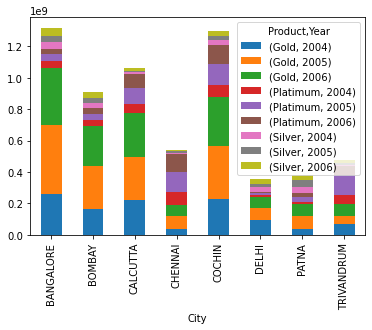

In [32]:
city_spend.plot(kind='bar',stacked=True)

### 4. Create graphs for
#### a) Monthly comparison of total spends, city wise

In [32]:
credit['monthly']=credit.Month_y.apply(lambda x:x.month)

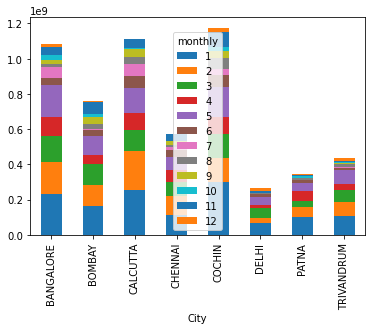

In [33]:
Month_wise=pd.pivot_table(index='City',columns=['monthly'],values='Amount_y',aggfunc='sum',data=credit)
Month_wise.plot(kind='bar',stacked=True)

#### b) Comparison of yearly spend on air tickets

In [45]:
year_spend=credit.loc[credit.Type=='AIR TICKET'].groupby(by='Year').Amount_y.sum().round(0).reset_index().sort_values(by='Amount_y')
year_spend

,Year,Amount_y
0,2004,112682288.0
2,2006,139632621.0
1,2005,287803079.0


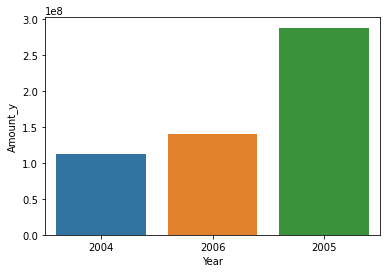

In [49]:
sns.barplot(x='Year',y='Amount_y',data=year_spend)

#### c) Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend

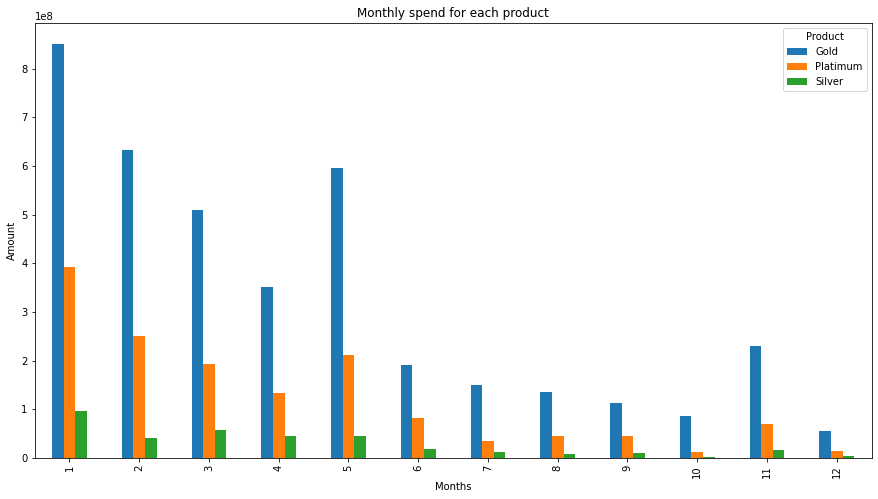

<Figure size 1080x864 with 0 Axes>

In [61]:
pd.pivot_table(index='monthly',columns='Product',values='Amount_y',aggfunc='sum',data=credit).plot(kind='bar',figsize=(15,8))
plt.title('Monthly spend for each product')
plt.xlabel('Months')
plt.ylabel('Amount')
plt.show()

### 5. Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [91]:
def top10(category,time_period):
    return credit.loc[(credit['Product']==category)].groupby(by=['Customer','City','Product',time_period])['Amount_x'].sum().reset_index().sort_values(by='Amount_x',ascending=False).head(10)    

In [95]:
top10('Gold','Month_wise_repay')

,Customer,City,Product,Month_wise_repay,Amount_x
173,A61,COCHIN,Gold,April,1.296887e+08
132,A42,BOMBAY,Gold,May,1.024656e+08
166,A60,CALCUTTA,Gold,January,9.369222e+07
163,A60,CALCUTTA,Gold,April,9.110750e+07
114,A30,BANGALORE,Gold,May,8.333683e+07
130,A42,BOMBAY,Gold,January,7.800373e+07
149,A44,DELHI,Gold,January,7.488710e+07
108,A29,CALCUTTA,Gold,May,7.052777e+07
179,A61,COCHIN,Gold,May,6.913653e+07
176,A61,COCHIN,Gold,January,6.669957e+07
